In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# plot options
plt.rcParams.update({'font.size': 11})
# plt.rcParams['figure.figsize'] = [16, 10] # for big plots
# %matplotlib notebook

#print option
pd.set_option("display.max_columns", 500)
# pd.set_option('display.max_rows',100)
# clear output in Jupyter cell
from IPython.display import clear_output

In [2]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

### load in the data and split into train and test

In [4]:
indata=datasets.fetch_olivetti_faces()

In [8]:
print(indata.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Reduce w/ PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(indata.data)

Train, test, and valid sets

In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X_reduced, indata.target, test_size=0.4, 
                                                    random_state=42, stratify=indata.target)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, 
                                                    random_state=42, stratify=y_temp)

# fit with KMeans

In [34]:
from sklearn.cluster import KMeans

In [64]:
ks=np.linspace(5,200,40).astype(int)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in ks]

In [76]:
silhouette_scores = np.array([metrics.silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k])

In [77]:
bestk=ks[np.argmax(silhouette_scores)]

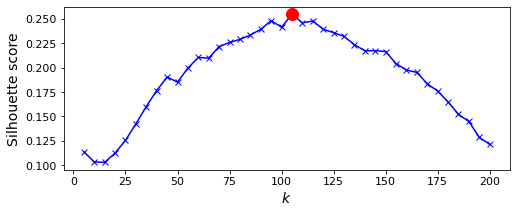

In [83]:
plt.figure(figsize=(8, 3))
plt.plot(ks, silhouette_scores, "bx-")
plt.plot(bestk,silhouette_scores[ks==bestk],'ro',markersize=12)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

In [85]:
best_model=KMeans(n_clusters=bestk, random_state=42).fit(X_train)